In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


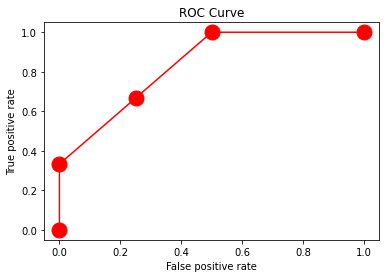

In [2]:
# Section 1 q5 (a)

x = [0, 0, 1/4, 2/4, 4/4]
y = [0, 2/6, 4/6, 6/6, 6/6]

plt.plot(x, y, marker='o', markerfacecolor='red', markersize=15, color='red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

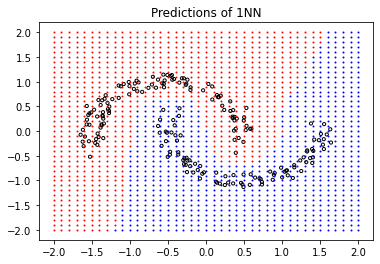

In [3]:
# Section 2 q1

# reading data, creating features and labels
data = pd.read_csv('hw3Data/D2z.txt', sep=" ", header=None)
data.columns = ['x1','x2','y']
X = data[['x1','x2']].values
y = data['y'].values

# produce test points
x1_values = np.arange(-2, 2.1, 0.1)
x2_values = np.arange(-2, 2.1, 0.1)
x_, y_ = np.meshgrid(x1_values,x2_values)
test_points = np.c_[x_.ravel(),y_.ravel()]

# fit classifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X, y)

# predict labels
preds = KNN.predict(test_points).reshape(x_.shape)

# plot
test_point_size = 10
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='none', edgecolors='black', s=test_point_size)
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='none', edgecolors='black', s=test_point_size)
    
for i in range(preds.shape[0]): # plot individual test points based on classification
    for j in range(preds.shape[1]):
        if preds[i,j] == 0:
            plt.plot(x_[i,j],y_[i,j], 'o', color='blue', markersize=1)
        else:
            plt.plot(x_[i,j],y_[i,j], 'o', color='red', markersize=1)

plt.title('Predictions of 1NN')
plt.show()

In [4]:
data = pd.read_csv('hw3Data/emails.csv')

In [5]:
# Section 2 q2

# features and labels
X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

# KFold
KF = KFold(n_splits = 5, shuffle=True, random_state=68)

# Calculating accuracy, precison and recall for each fold 
accuracy_scores = []
precision_scores = []
recall_scores = []

for train_i, test_i in KF.split(X):
    X_train, X_test = X.iloc[train_i], X.iloc[test_i]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]
    
    KNN = KNeighborsClassifier(n_neighbors = 1)
    KNN.fit(X_train, y_train)
    preds = KNN.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, preds))
    precision_scores.append(precision_score(y_test, preds))
    recall_scores.append(recall_score(y_test, preds))
    
# print scores
for i in range(5):
    print(f'Fold {i+1} - Accuracy: {accuracy_scores[i]:.4f}, Precision: {precision_scores[i]:.4f}, Recall: {precision_scores[i]:.4f}\n')

Fold 1 - Accuracy: 0.8500, Precision: 0.6910, Recall: 0.6910

Fold 2 - Accuracy: 0.8840, Precision: 0.7601, Recall: 0.7601

Fold 3 - Accuracy: 0.8640, Precision: 0.7325, Recall: 0.7325

Fold 4 - Accuracy: 0.8680, Precision: 0.7530, Recall: 0.7530

Fold 5 - Accuracy: 0.8660, Precision: 0.7122, Recall: 0.7122



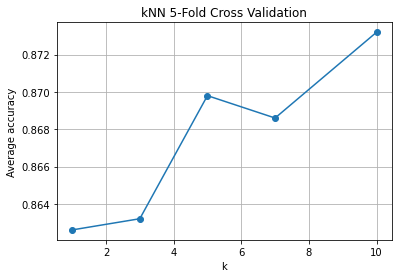

Average accuracy for k=1: 0.8626

Average accuracy for k=3: 0.8632

Average accuracy for k=5: 0.8698

Average accuracy for k=7: 0.8686

Average accuracy for k=10: 0.8732



In [6]:
# Section 2 q4

# Use X and y from q2

k_values = [1,3,5,7,10]

avg_accuracies = {}

for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KF = KFold(n_splits = 5, shuffle=True, random_state=79)
    acc_arr = cross_val_score(KNN, X, y, cv=KF, scoring='accuracy')
    avg_acc = np.mean(acc_arr)
    avg_accuracies[k] = avg_acc
    
plt.plot(list(avg_accuracies.keys()), list(avg_accuracies.values()), marker='o')
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.title('kNN 5-Fold Cross Validation')
plt.grid(True)
plt.show()

for k, acc in avg_accuracies.items():
    print(f'Average accuracy for k={k}: {acc:.4f}\n')

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


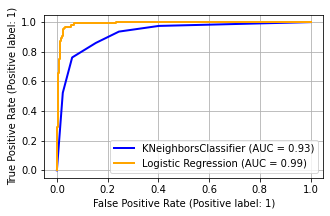

In [7]:
# Section 2 q5

# splitting train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# KNN is training k-Nearest neighbors and LOG is training logistic regression
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
LOG = LogisticRegression()
LOG.fit(X_train, y_train)

# predicting probabilities
knn_preds = KNN.predict_proba(X_test)[:,1]
log_preds = LOG.predict_proba(X_test)[:,1]

# ROC curves
FP_KNN, TP_KNN, _ = roc_curve(y_test, knn_preds)
ROC_AUC_KNN = auc(FP_KNN, TP_KNN)
FP_LOG, TP_LOG, _ = roc_curve(y_test, log_preds)
ROC_AUC_LOG = auc(FP_LOG, TP_LOG)

# plot
plt.figure(figsize=(5,3))
plt.plot(FP_KNN, TP_KNN, color='blue', lw=2, label='KNeighborsClassifier (AUC = {:.2f})'.format(ROC_AUC_KNN))
plt.plot(FP_LOG, TP_LOG, color='orange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(ROC_AUC_LOG))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [12]:
# functions and methods for logistic regression
def sigma(a):
    return (np.exp(a)/(1 + np.exp(-a)))

class LogisticRegression:
    def __init__(self, lr=0.01, epochs=500):
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        
        for e in range(self.epochs):
            y_hat = sigma(np.dot(X, self.theta))
            err = y_hat - y
            grad = np.dot(X.T, err) / len(y)
            self.theta = self.theta - (self.lr * grad)
    
    def predict(self, X):
        return np.round(sigma(np.dot(X, self.theta)))
    
def clean(X):
    X.fillna(0, inplace=True)  
    y.fillna(0, inplace=True) 
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.dropna(inplace=True)
    return X

In [15]:
# Section 2 q3

X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

X = clean(X)
y = clean(y)

KF = KFold(n_splits = 5, shuffle=True, random_state=72)

accuracy_scores = []
precision_scores = []
recall_scores = []

for train_i, val_i in KF.split(X):
    X_train, X_val = X.iloc[train_i], X.iloc[val_i]
    y_train, y_val = y.iloc[train_i], y.iloc[val_i]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = model.predict(X_val)
    
    y_hat = pd.DataFrame(y_hat)
    y_hat = clean(y_hat)
    y_hat = y_hat.values
    
    accuracy_scores.append(accuracy_score(y_val, y_hat))
    precision_scores.append(precision_score(y_val, y_hat))
    recall_scores.append(recall_score(y_val, y_hat))
    
# print scores
for i in range(5):
    print(f'Fold {i+1} - Accuracy: {accuracy_scores[i]:.4f}, Precision: {precision_scores[i]:.4f}, Recall: {precision_scores[i]:.4f}\n')

/var/folders/vf/05jz4ppn6p96cb3fr8z0fgqc0000gn/T/ipykernel_59681/3711427549.py:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(a)/(1 + np.exp(-a)))
/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/vf/05jz4ppn6p96cb3fr8z0fgqc0000gn/T/ipykernel_59681/3711427549.py:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(a)/(1 + np.exp(-a)))
/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/vf/05jz4ppn6p96cb3fr8z0fgqc0000gn/T/ipykernel

Fold 1 - Accuracy: 0.7080, Precision: 0.0000, Recall: 0.0000

Fold 2 - Accuracy: 0.7080, Precision: 0.0000, Recall: 0.0000

Fold 3 - Accuracy: 0.7040, Precision: 0.0000, Recall: 0.0000

Fold 4 - Accuracy: 0.7060, Precision: 0.0000, Recall: 0.0000

Fold 5 - Accuracy: 0.7280, Precision: 0.0000, Recall: 0.0000



/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
